In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from wordcloud import WordCloud

In [15]:
df = pd.read_csv("metadata.csv", low_memory=False)

In [17]:
df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non-null   object 
 16  

# veri temizleme ve hazırlama

In [22]:
# sütunlarda bulunan null değer sayıları

df.isnull().sum()

cord_uid                  0
sha                  682894
source_x                  0
title                   503
doi                  399880
pmcid                667089
pubmed_id            557728
license                   0
abstract             235544
publish_time           1814
authors               23869
journal               87322
mag_id              1056660
who_covidence_id     573725
arxiv_id            1042411
pdf_json_files       682894
pmc_json_files       740918
url                  369726
s2_id                 80192
dtype: int64

In [24]:
# eksik değer oranlarını yüzde olarak hesaplama

missing = df.isnull().mean().sort_values(ascending=False) * 100
missing

mag_id              100.000000
arxiv_id             98.651506
pmc_json_files       70.118865
pdf_json_files       64.627600
sha                  64.627600
pmcid                63.131849
who_covidence_id     54.296084
pubmed_id            52.782163
doi                  37.843772
url                  34.990063
abstract             22.291371
journal               8.263964
s2_id                 7.589196
authors               2.258910
publish_time          0.171673
title                 0.047603
license               0.000000
source_x              0.000000
cord_uid              0.000000
dtype: float64

In [26]:
# nümerik sütunlar 

numeric_cols = df.select_dtypes(include=["int64","float64"]).columns
numeric_cols

Index(['mag_id', 's2_id'], dtype='object')

In [28]:
# nümerik sütunları medyan ile doldurma

for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median = df[col].median()
        df[col] = df[col].fillna(median)
        print(f"{col} sütunu medyan ({median}) ile dolduruldu.")

mag_id sütunu medyan (nan) ile dolduruldu.
s2_id sütunu medyan (232082903.0) ile dolduruldu.


In [30]:
# kategorik sütunlar

categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url'],
      dtype='object')

In [32]:
# kategorik sütunları unknown ile doldurma

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna("Unknown")
        print(f"{col} sütunu 'Unknown' ile dolduruldu.")

sha sütunu 'Unknown' ile dolduruldu.
title sütunu 'Unknown' ile dolduruldu.
doi sütunu 'Unknown' ile dolduruldu.
pmcid sütunu 'Unknown' ile dolduruldu.
pubmed_id sütunu 'Unknown' ile dolduruldu.
abstract sütunu 'Unknown' ile dolduruldu.
publish_time sütunu 'Unknown' ile dolduruldu.
authors sütunu 'Unknown' ile dolduruldu.
journal sütunu 'Unknown' ile dolduruldu.
who_covidence_id sütunu 'Unknown' ile dolduruldu.
arxiv_id sütunu 'Unknown' ile dolduruldu.
pdf_json_files sütunu 'Unknown' ile dolduruldu.
pmc_json_files sütunu 'Unknown' ile dolduruldu.
url sütunu 'Unknown' ile dolduruldu.


In [34]:
# threshold ile yüksek oranda fazla eksik değer olan sütun veya columnları droplama

threshold = 70
drop_cols = missing[missing > threshold].index
df = df.drop(columns=drop_cols)
print(f"Silinen sütunlar: {list(drop_cols)}")

Silinen sütunlar: ['mag_id', 'arxiv_id', 'pmc_json_files']


In [36]:
# null data check

check = df.isnull().sum()
check

cord_uid            0
sha                 0
source_x            0
title               0
doi                 0
pmcid               0
pubmed_id           0
license             0
abstract            0
publish_time        0
authors             0
journal             0
who_covidence_id    0
pdf_json_files      0
url                 0
s2_id               0
dtype: int64

In [38]:
# verinin temiz halini kopyalıyorum yeni bir değişkene

df_clean = df.copy()

In [40]:
for col in categorical_cols:
    print(f"{col}:\n{df_clean[col].value_counts(normalize=True)}\n")

cord_uid:
cord_uid
kgpo6psq    1.817046e-04
6i2l8rgc    9.463782e-05
3xm3rbz5    9.369144e-05
m1tx74tc    7.571026e-05
b9gdfs11    7.476388e-05
                ...     
5wo4zeio    9.463782e-07
hv6wkwmw    9.463782e-07
i6iqjg5p    9.463782e-07
vj75wvew    9.463782e-07
pq54lvya    9.463782e-07
Name: proportion, Length: 970836, dtype: float64

sha:
sha
Unknown                                     6.462760e-01
31bc0fb718edaab9e33f678909710f62c40abebc    2.839135e-06
0ed3c6a5559cd73307184f51fc53ccc76da559bc    2.839135e-06
c355c664d6e9fb34fc88fb0e205807dd7f7f22a6    1.892756e-06
4fe31065287b1c3a35319e460dd418d6349f4ca8    1.892756e-06
                                                ...     
95681279dc44e54daf711c4e8786e842b8957cee    9.463782e-07
60485f3ac525b6dcf707d0d3243d8617c2a67cfa    9.463782e-07
aa81fda1d1bdc406ad143ce944e7b21ed5464498    9.463782e-07
9681d7f11389c2b77991539b51e3c676e35cbaea    9.463782e-07
c7ae1a19b70e6e2806b670e4c0f64d3043698ee1    9.463782e-07
Name: proportion, Le

KeyError: 'arxiv_id'

In [42]:
# tarihi datetime' a çevirme

df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')
df_clean['year'] = df_clean['publish_time'].dt.year

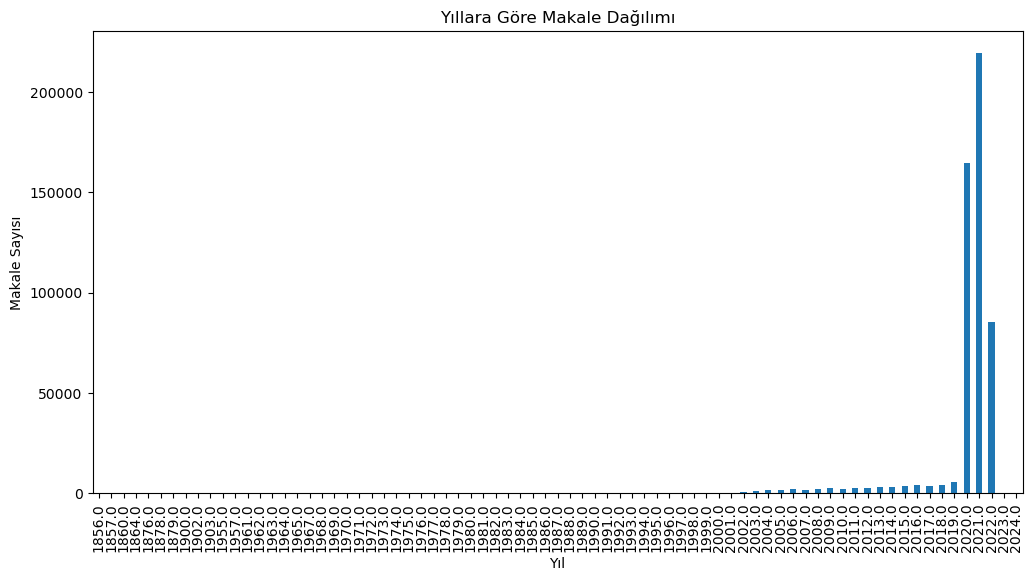

In [44]:
# yıllara göre makale sayısı graph

df_clean['year'].value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title("Yıllara Göre Makale Dağılımı")
plt.xlabel("Yıl")
plt.ylabel("Makale Sayısı")
plt.show()

# metin ön işleme

In [61]:
# başlık ve özet

df_clean_sample["text"] = df_clean_sample["title"].astype(str) + " " + df_clean_sample["abstract"].astype(str)

In [63]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /Users/doauzunda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/doauzunda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
# burada dataset'in büyüklüğü yüzünden ilk 100 veri ile işlemler yapılmıştır.

df_clean_sample = df_clean.head(1000).copy()

def clean_text(text):
    if pd.isnull(text):
        return ""

    tokens = word_tokenize(text.lower())
    words = [word for word in tokens if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

df_clean_sample['text_clean'] = df_clean_sample['text'].apply(clean_text)

In [71]:
# check

df_clean_sample[['text', 'text_clean']].head(100)

,text,text_clean
0,Clinical features of culture-proven Mycoplasma...,clinical features mycoplasma pneumoniae infect...
1,Nitric oxide: a pro-inflammatory mediator in l...,nitric oxide mediator lung disease inflammator...
2,Surfactant protein-D and pulmonary host defens...,surfactant pulmonary host defense surfactant p...
3,Role of endothelin-1 in lung disease Endotheli...,role lung disease amino acid peptide diverse b...
4,Gene expression in epithelial cells in respons...,gene expression epithelial cells response pneu...
...,...,...
95,Global Surveillance of Emerging Influenza Viru...,global surveillance emerging influenza virus g...
96,Transmission Parameters of the 2001 Foot and M...,transmission parameters foot mouth epidemic gr...
97,Efficient replication of pneumonia virus of mi...,efficient replication pneumonia virus mice pvm...
98,Designing and conducting tabletop exercises to...,designing conducting tabletop exercises assess...


# görselleştirme ve analiz

In [ ]:
all_words = " ".join(df_clean_sample['text_clean'].tolist())

wordcloud = WordCloud(width=1200, height=600, background_color='white').generate(all_words)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df_clean_sample['vaccine'] = df_clean_sample['text_clean'].apply(lambda x: 1 if 'vaccine' in x else 0)

vaccine_trend = df_clean.groupby('year')['vaccine'].sum()

vaccine_trend.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Yıllara Göre 'Vaccine' Anahtar Kelimesi")
plt.xlabel("Yıl")
plt.ylabel("Geçme Sayısı")
plt.show()

In [ ]:
from sklearn.future_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df_clean['text_clean'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

for index, topic in enumerate(lda.components_):
    print(f" Topic #{index}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])